In [4]:
import pandas as pd # Dataframe (allows for multiple different structures/data types in one database frame)
import numpy as np # Array style (only one data-type is allowed)
import matplotlib.pyplot as plt   # The default processing plot platform for python
import seaborn as sns  # A fancier way to plot things with nice animations and color

import scipy.stats as stats
import statsmodels.api as sm      # Scipy or sklearn or statmodels.api
import statsmodels.formula.api as smf # A way to do forward and backward selections

from statsmodels.graphics.plot_grids import scatter_ellipse
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.lines as mlines
import matplotlib.transforms as mtransform


import random
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics

In [5]:
forecast_length = pd.read_csv('RUL_forecast_length.csv')
print(forecast_length.dtypes)
print(forecast_length.head())
print(forecast_length.describe())

Forecast Length    int64
Engine id          int64
dtype: object
   Forecast Length  Engine id
0               86         51
1               86         52
2               78         53
3              103         54
4               78         55
       Forecast Length  Engine id
count        50.000000   50.00000
mean         86.200000   75.50000
std          22.060214   14.57738
min          54.000000   51.00000
25%          72.000000   63.25000
50%          82.500000   75.50000
75%          95.250000   87.75000
max         145.000000  100.00000


In [6]:
train_data = pd.read_csv('train_data.csv')
print(train_data.dtypes)
print(train_data.head())
print(train_data.describe())

Engine id                  int64
Cycle number               int64
Operation Condition 1    float64
Operation Condition 2    float64
Operation Condition 3    float64
T2                       float64
T24                      float64
T30                      float64
T50                      float64
P2                       float64
P15                      float64
P30                      float64
Nf                       float64
Nc                       float64
epr                      float64
Ps30                     float64
phi                      float64
NRf                      float64
NRc                      float64
BPR                      float64
farB                     float64
htBleed                    int64
Nf_dmd                     int64
PCNfR_dmd                float64
W31                      float64
W32                      float64
dtype: object
   Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0          1             1                -0.0007   

In [7]:
test_data = pd.read_csv('test_data.csv')
print(test_data.dtypes)
print(test_data.head())
print(test_data.describe())

Engine id                  int64
Cycle number               int64
Operation Condition 1    float64
Operation Condition 2    float64
Operation Condition 3    float64
T2                       float64
T24                      float64
T30                      float64
T50                      float64
P2                       float64
P15                      float64
P30                      float64
Nf                       float64
Nc                       float64
epr                      float64
Ps30                     float64
phi                      float64
NRf                      float64
NRc                      float64
BPR                      float64
farB                     float64
htBleed                    int64
Nf_dmd                     int64
PCNfR_dmd                float64
W31                      float64
W32                      float64
dtype: object
   Engine id  Cycle number  Operation Condition 1  Operation Condition 2  \
0         51             1                 0.0032   

In [8]:
##### THE BELOW CODE IS ADAPTED FROM KOEN PETERS BLOG POST: 
#https://towardsdatascience.com/predictive-maintenance-of-turbofan-engines-ec54a083127

In [9]:
index_names = ['engine_id', 'cycle_num']
operation_names = ['condition_1', 'condition_2', 'condition_3']
sensor_names = ['sensor_{}'.format(i) for i in range(1,22)] 
col_names = index_names + operation_names + sensor_names


train = pd.read_csv(('train_data.csv'), header=0, names=col_names)
test = pd.read_csv(('test_data.csv'), header=0, names=col_names)
y_test = pd.read_csv(('RUL_forecast_length.csv'), header=0, names=['RUL'])


train.head()

,engine_id,cycle_num,condition_1,condition_2,condition_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [12]:
def add_remaining_useful_life(df):
    
    grouped_by_unit = df.groupby(by="engine_id")
    max_cycle = grouped_by_unit["cycle_num"].max()
    
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='engine_id', right_index=True)
    
    remaining_useful_life = result_frame["max_cycle"] - result_frame["cycle_num"]
    result_frame["RUL"] = remaining_useful_life
    
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']]

,engine_id,cycle_num,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
9904,50,194,4
9905,50,195,3
9906,50,196,2
9907,50,197,1


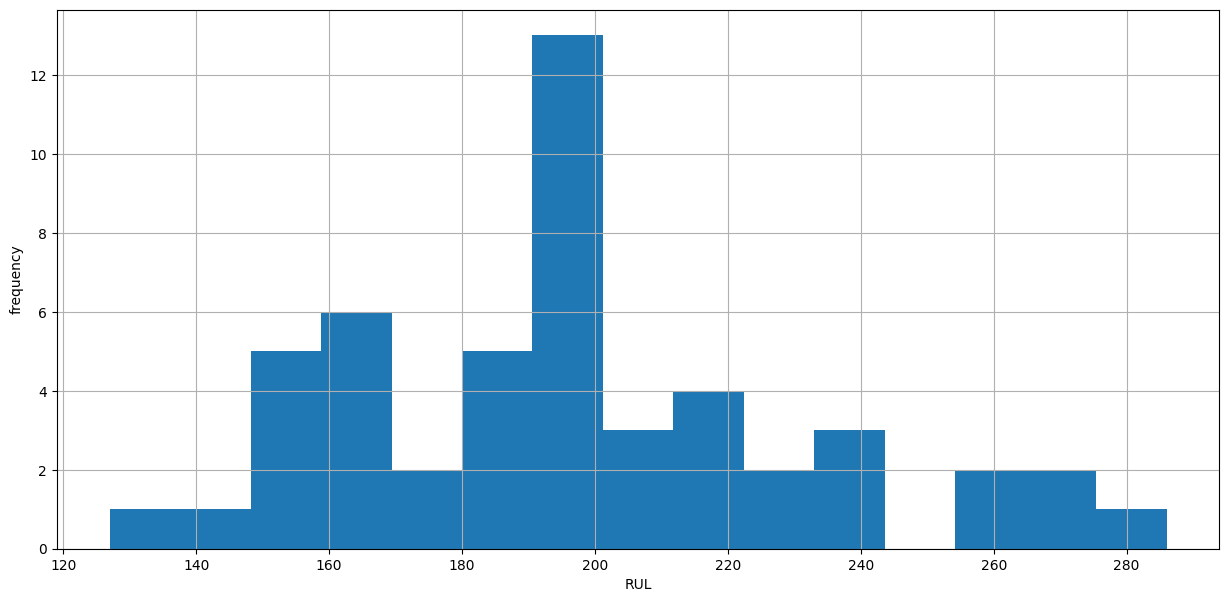

In [57]:
df_max_rul = train[['engine_id', 'RUL']].groupby('engine_id').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

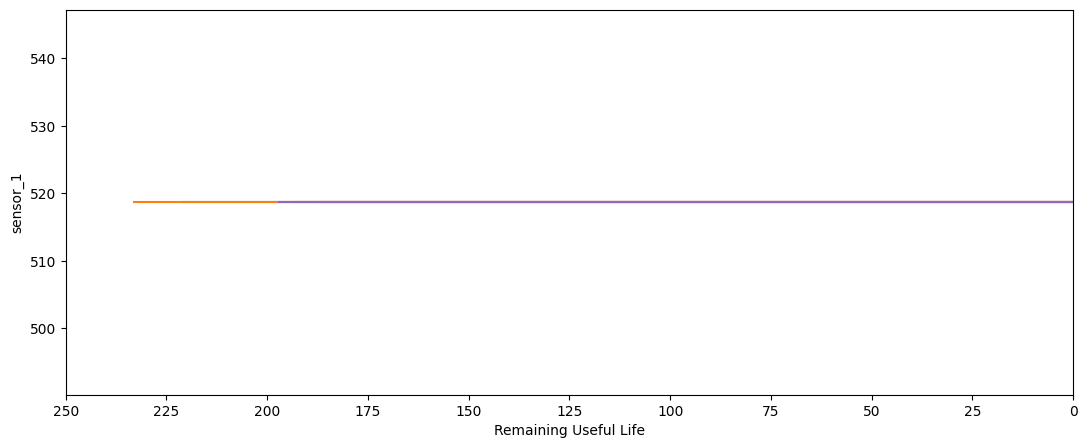

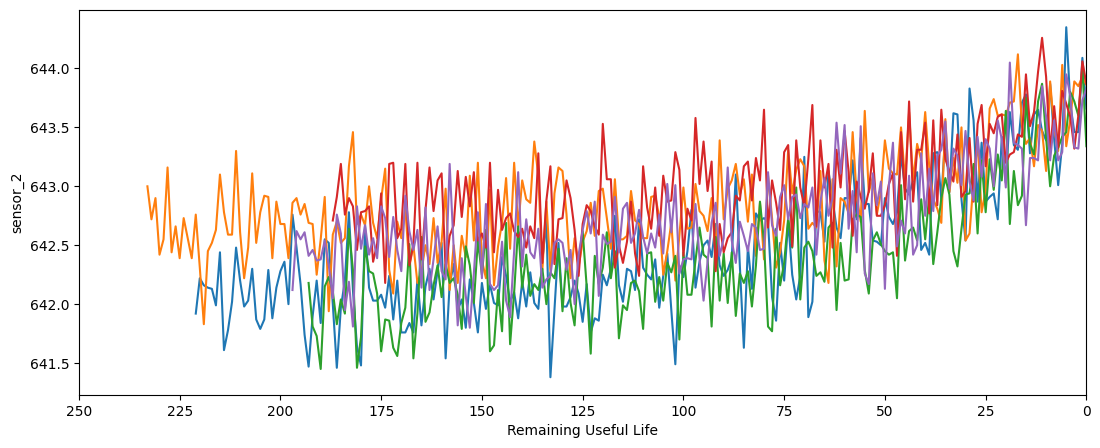

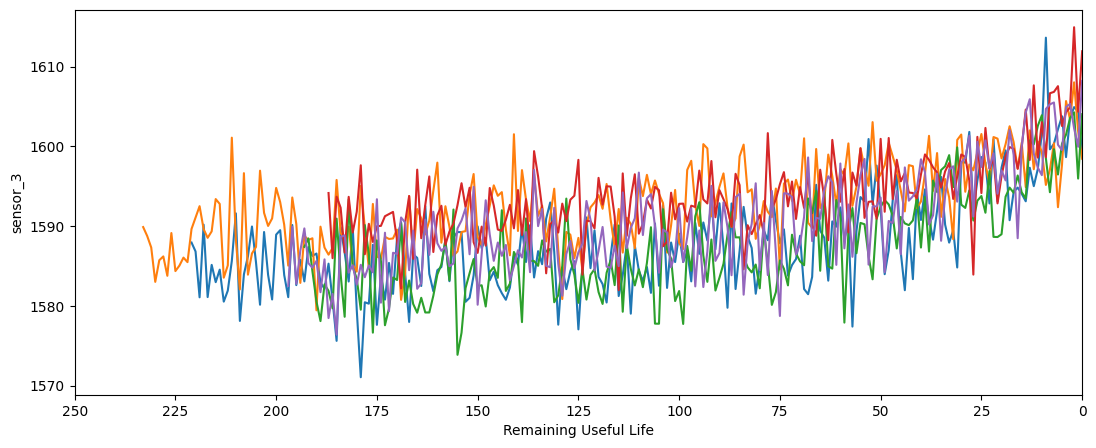

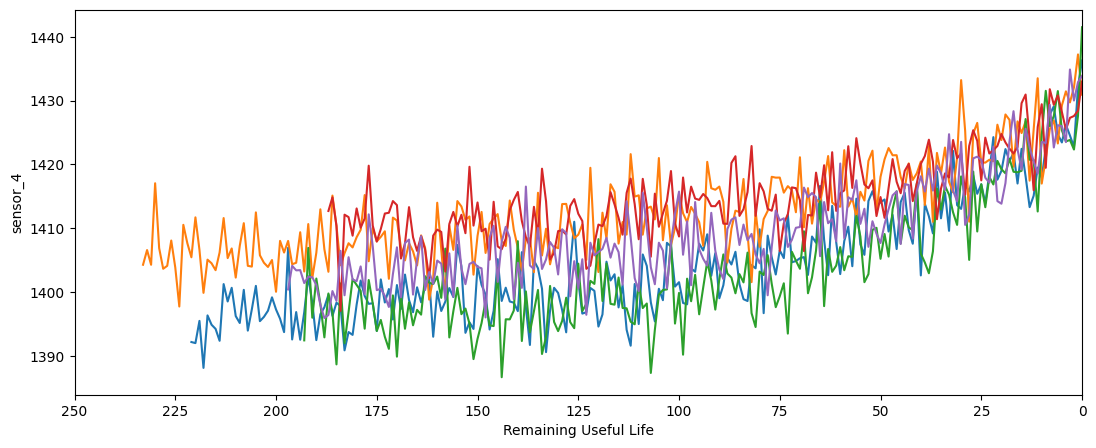

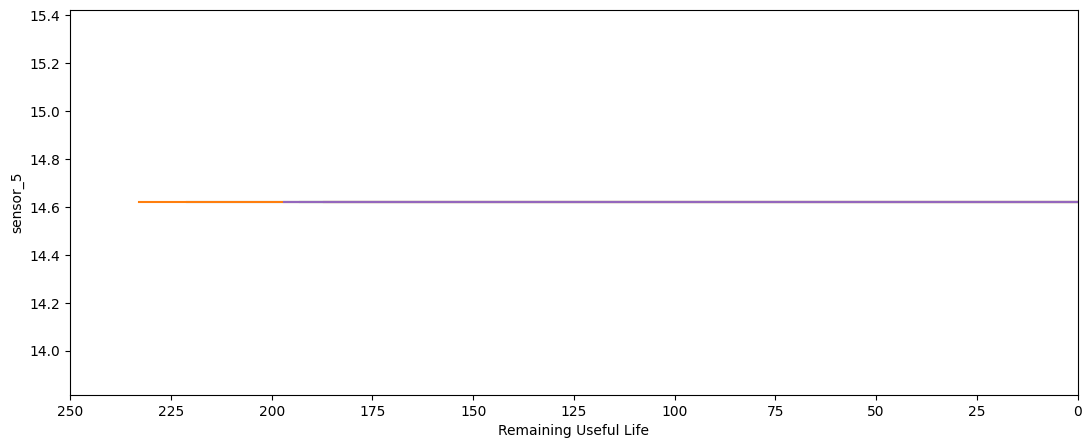

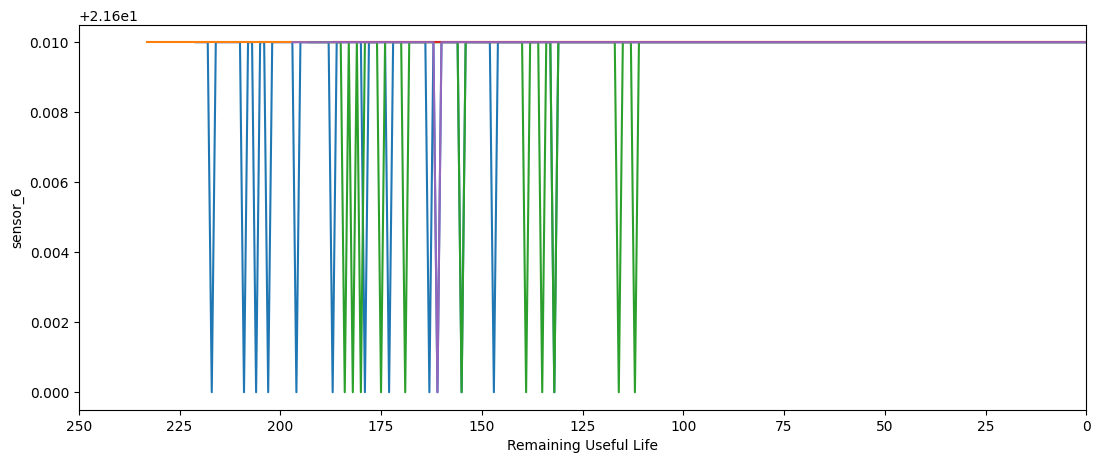

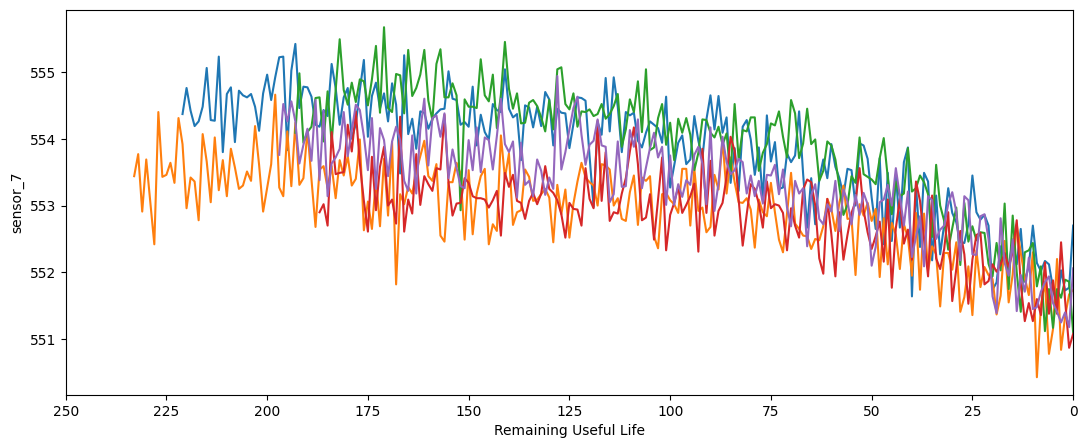

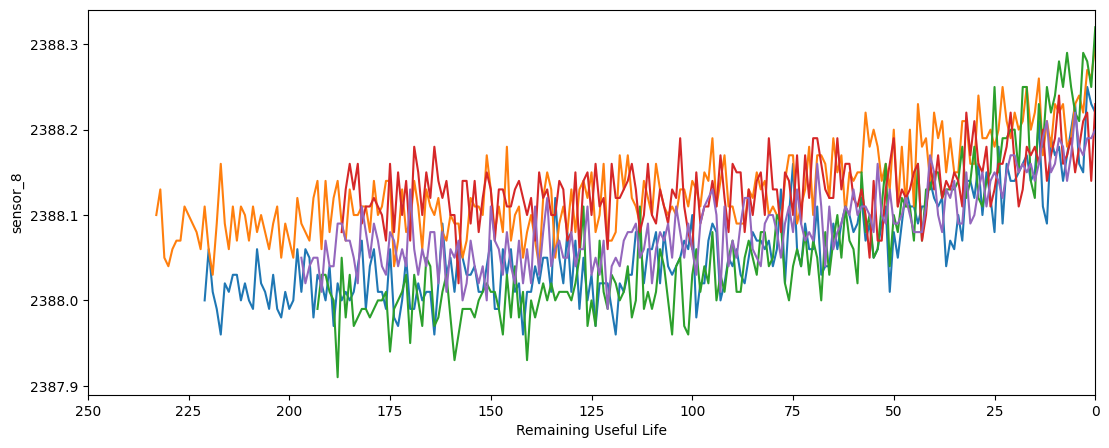

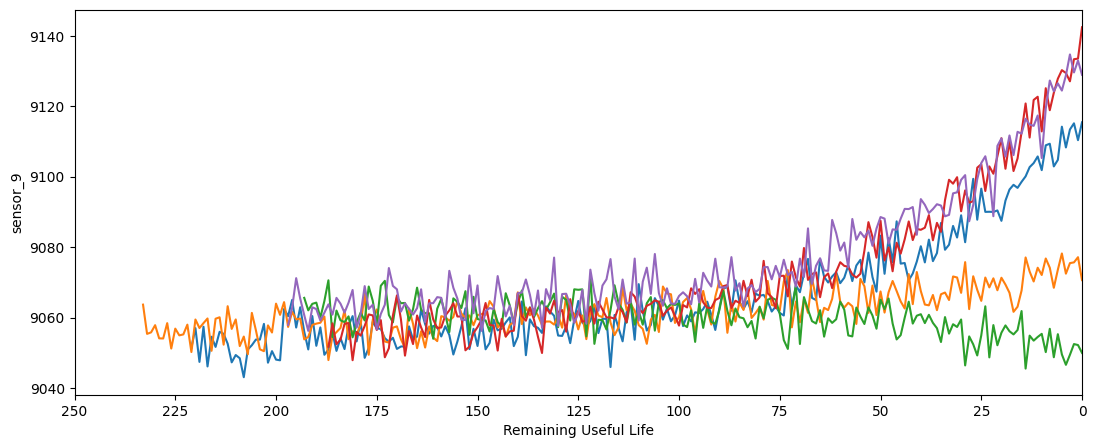

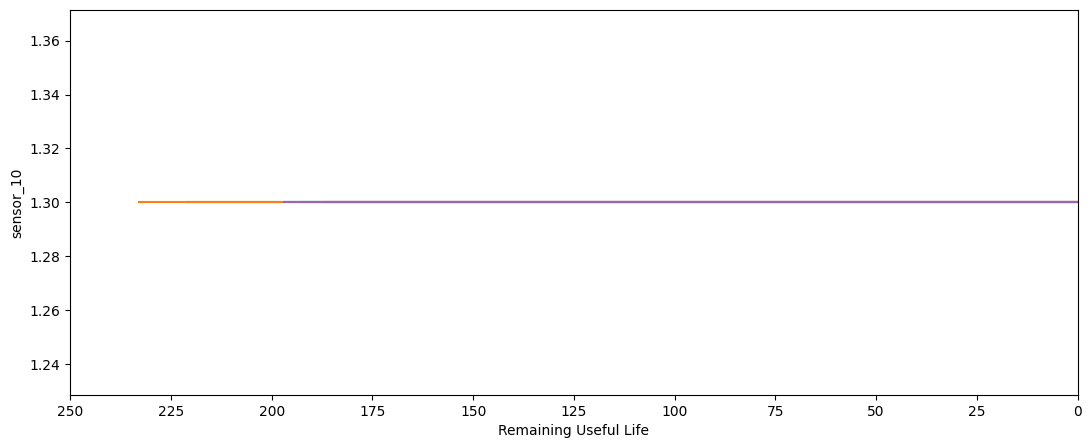

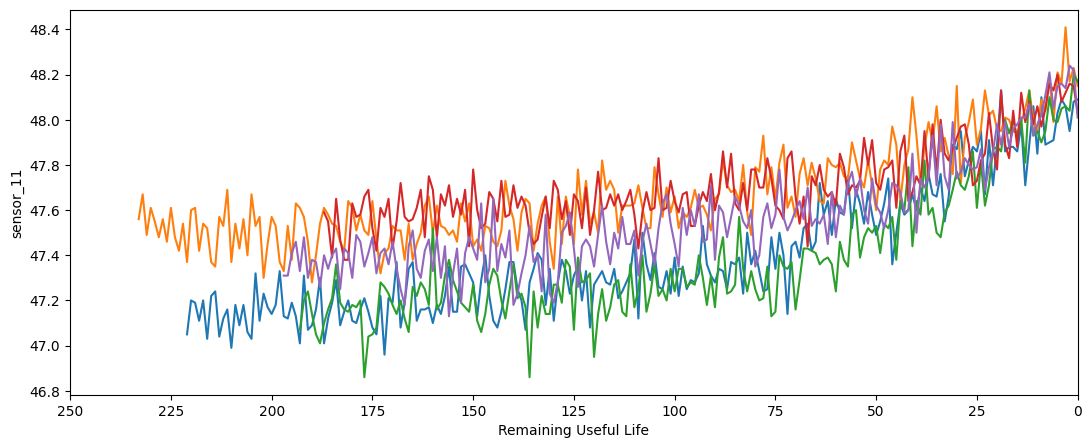

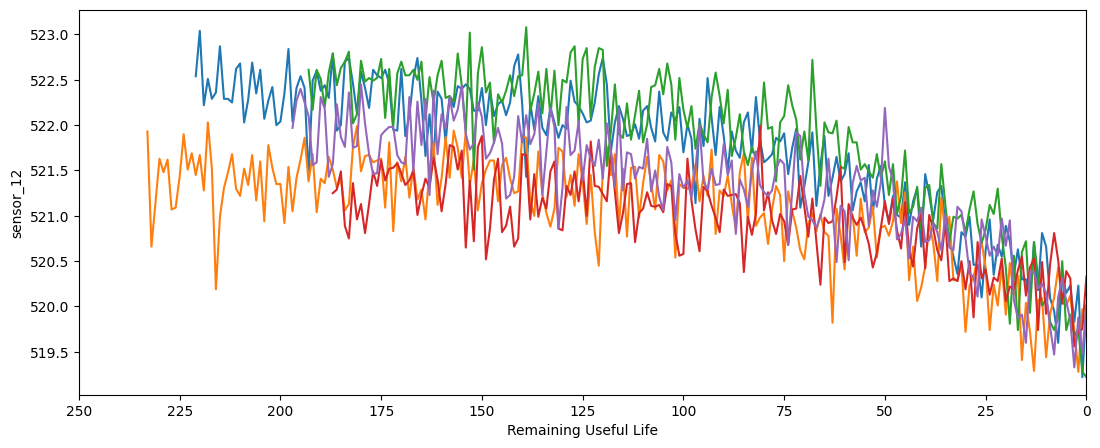

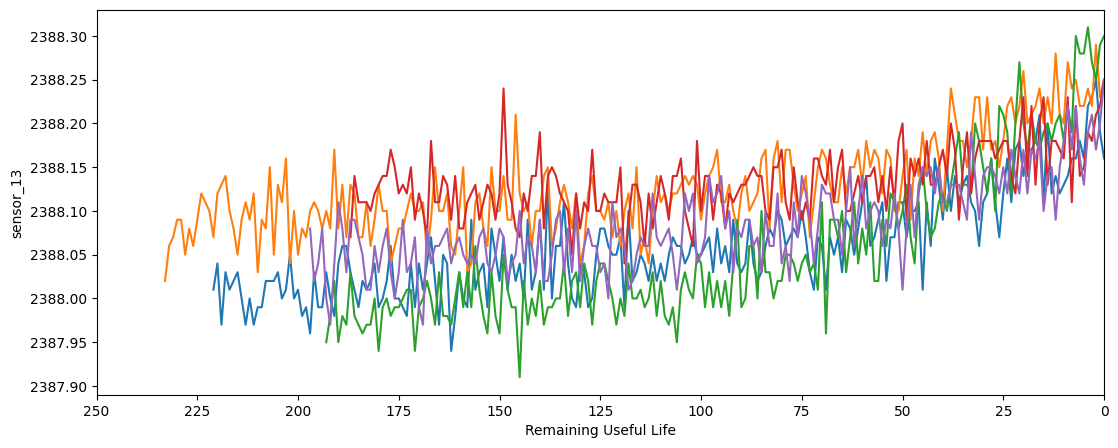

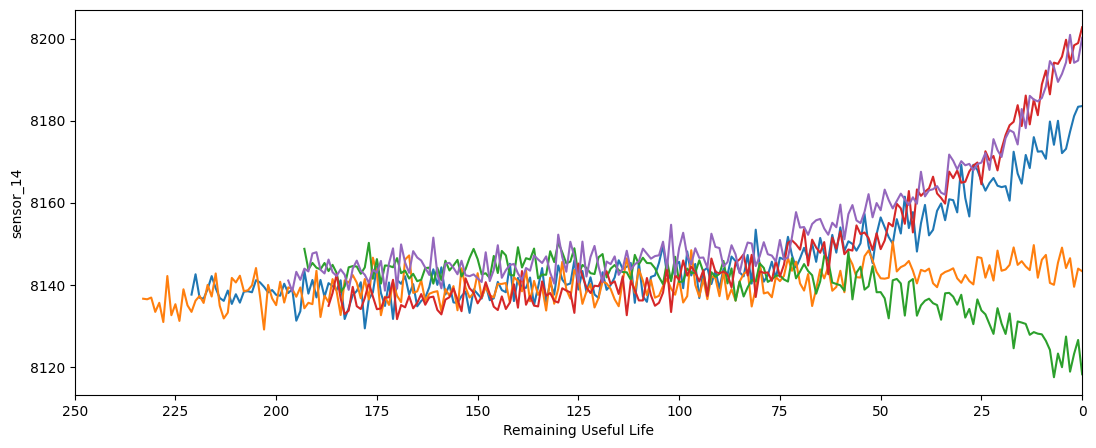

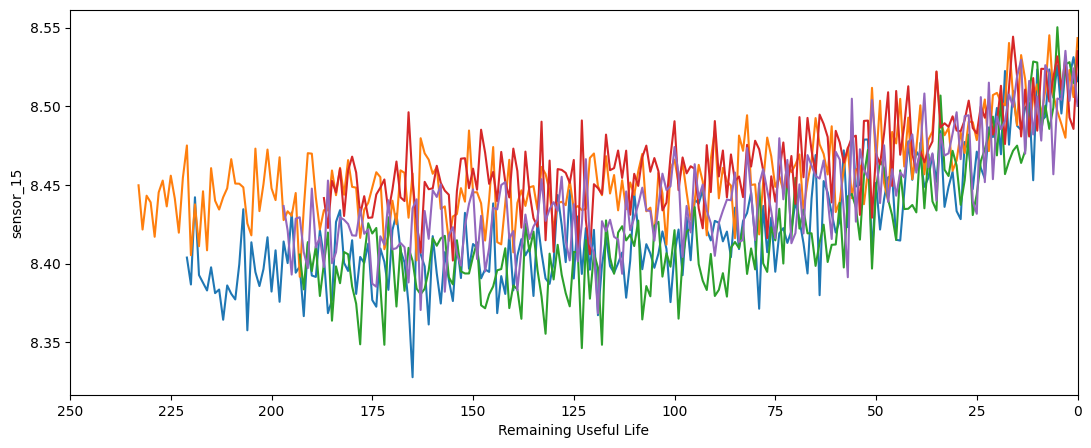

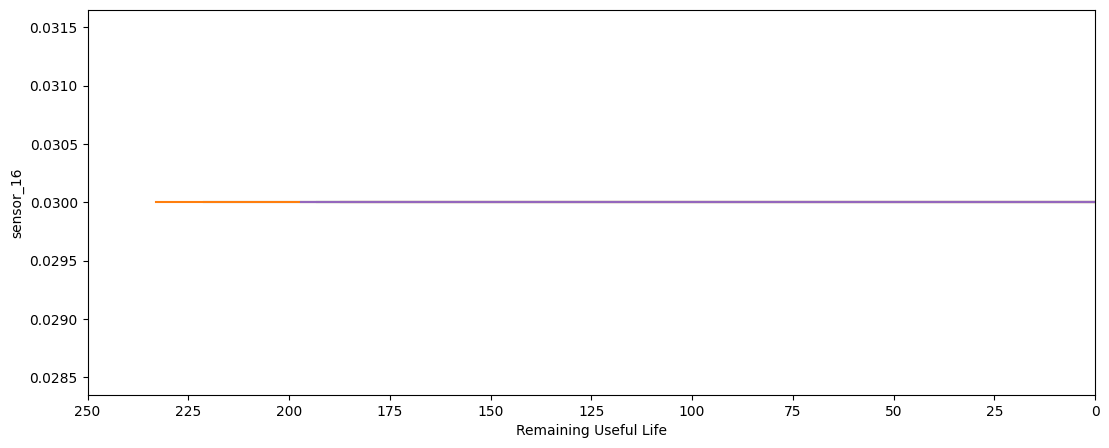

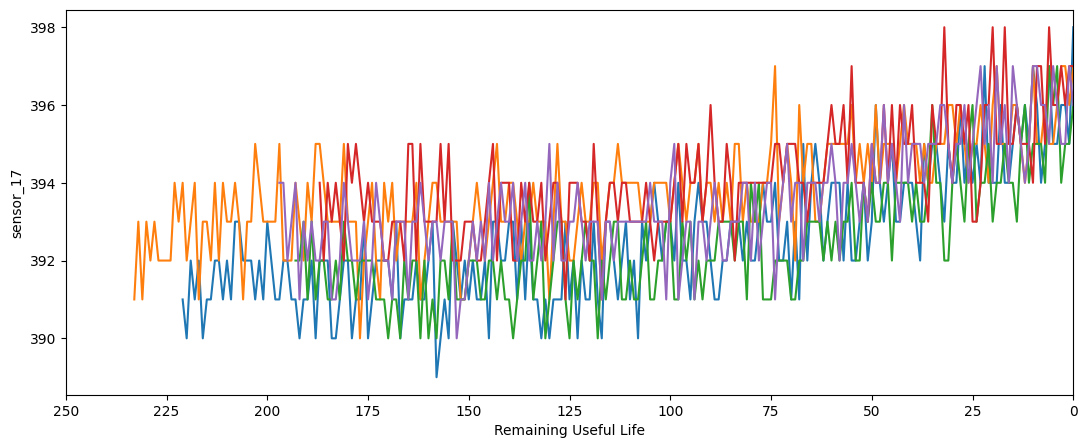

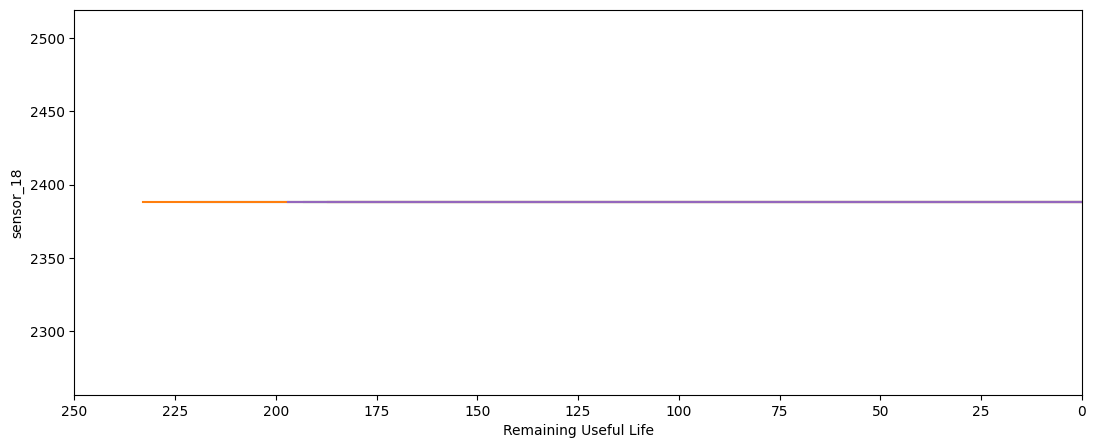

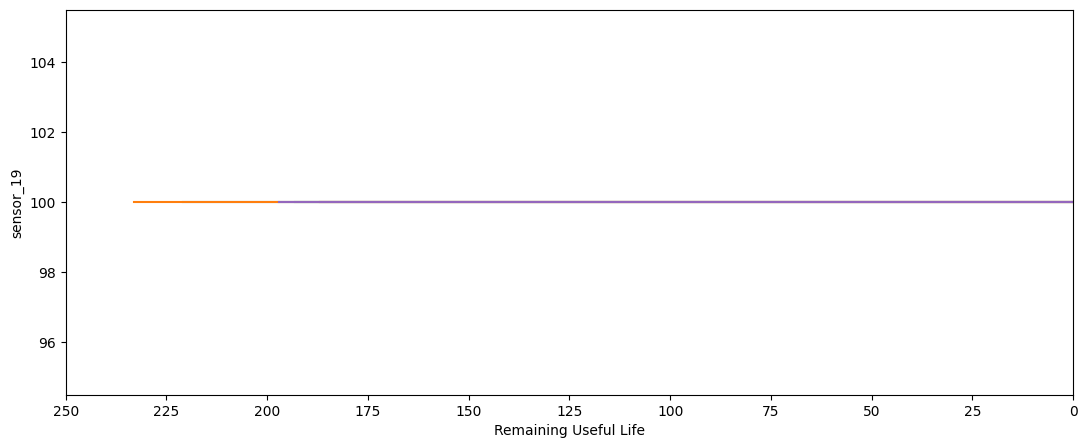

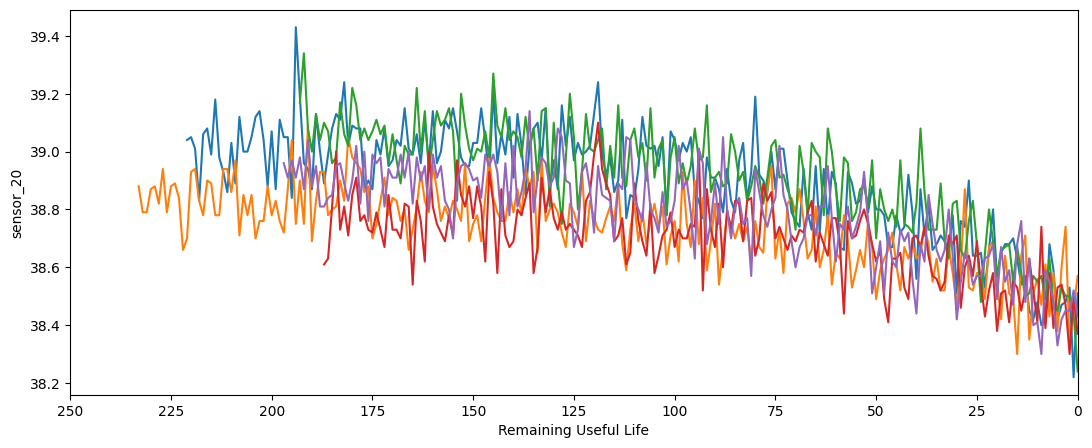

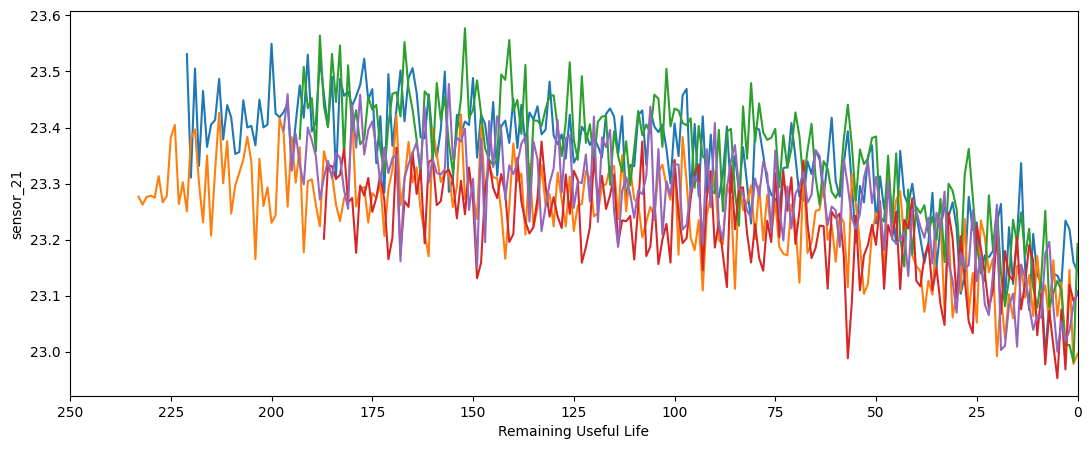

In [58]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['engine_id'].unique():
        if (i % 10 == 0):  # only plot every 10th engine_id to reduce the amount of charts
            plt.plot('RUL', sensor_name, 
                     data=train[train['engine_id']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero from 250, instead of 0 to 250
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

In [59]:
#exclude plots 1,5,10,16,18,19 since the line is constant. Shows no increase or decrease in RUL

In [62]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [63]:
drop_sensors = ['sensor_1','sensor_5','sensor_6','sensor_10','sensor_16','sensor_18','sensor_19']
drop_labels = index_names+operation_names+drop_sensors

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same
X_test = test.groupby('engine_id').last().reset_index().drop(drop_labels, axis=1)


print(X_train.columns)

Index(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_17', 'sensor_20', 'sensor_21'],
      dtype='object')


In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:35.82863257318627, R2:0.6694886308180142
test set RMSE:39.97428359339496, R2:-6.673197353206075


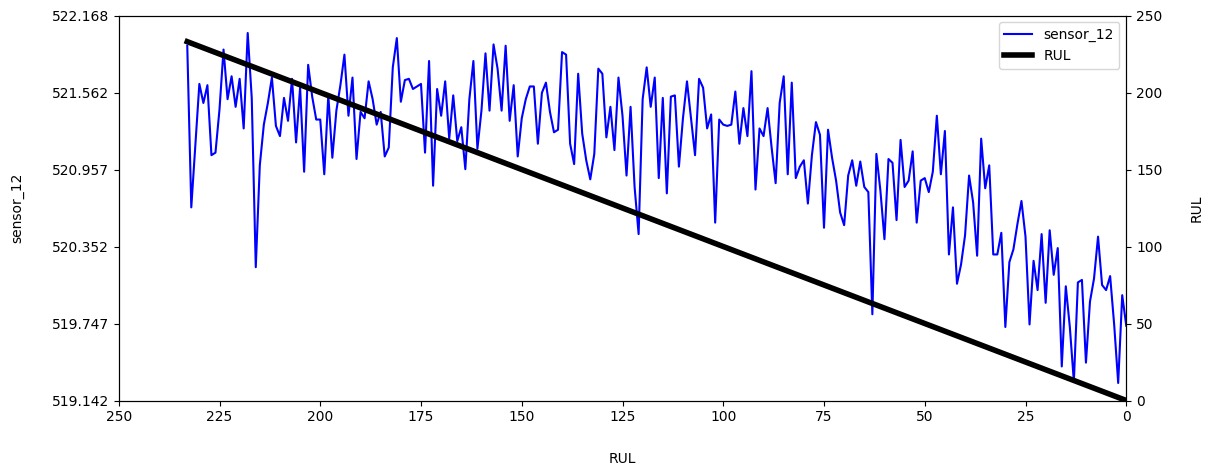

In [68]:
fig, ax1 = plt.subplots(1,1, figsize=(13,5))

signal = ax1.plot('RUL', 'sensor_12', 'b',
                 data=train.loc[train['engine_id']==20])
plt.xlim(250, 0)
plt.xticks(np.arange(0, 275, 25))
ax1.set_ylabel('sensor_12', labelpad=20)
ax1.set_xlabel('RUL', labelpad=20)

ax2 = ax1.twinx()
rul_line = ax2.plot('RUL', 'RUL', 'k', linewidth=4,
                   data=train.loc[train['engine_id']==20])
ax2.set_ylabel('RUL', labelpad=20)


ax2.set_ylim(0, 250)  
ax2.set_yticks(
    np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))
ax1.set_yticks(
    np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))

lines = signal+rul_line
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=0)


plt.show()

In [67]:
#For cycle 250 - 100, the mean sensor signal is somehwat stable, while RUL is declining.
#Below 100 cycles, both the mean sensor signal and RUL are declining. Sensor signal and RUL are
#linearly correlated